<h1> Visualize Signal and BG PDF for profile likelihood </h1>

In [131]:
from __future__ import division
import sys
home_dir=!echo "$HOME"
sys.path.insert(2,home_dir[0]+'/iPyNb/NERSC_Import') 
from pyROOT_import import *
from pyNEST import *
from ROOT import TH2D
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # set size of figures"
plt.rcParams.update({'font.size': 20})

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<h1> WS cuts </h1>

In [2]:
#WS cuts
S1_min=0
S1_max=20
S2raw_min=450
#NS1_coin_req=3

#define. calc LZ  nominal exposure
def calc_exposure(S1_cut, S2_cut, S1_win_max=20):
    LZ_count=size(S1_cut[S1_cut<S1_win_max])/Det_exposure_factor
    LZ_count_underNr=size(S1_cut[(S1_cut<S1_win_max) & (log10(S2_cut/S1_cut)<sNR(S1_cut))])/Det_exposure_factor
    sig_LZ_count=sqrt(size(S1_cut[S1_cut<S1_win_max]))/Det_exposure_factor
    sig_LZ_count_underNr=sqrt(size(S1_cut[(S1_cut<20) & (log10(S2_cut/S1_cut)<sNR(S1_cut))]))/Det_exposure_factor
    print('Count (0 to '+str(S1_win_max) + ' S1) = '+'{:.3f}'.format(LZ_count) + ' +/- ' + '{:.3f}'.format(sig_LZ_count) )
    print('Count below NR mean (0 to '+str(S1_win_max) + ' S1) = '+'{:.3f}'.format(LZ_count_underNr) + ' +/- ' + '{:.3f}'.format(sig_LZ_count_underNr) )

<h1> Generate ER and NR bands </h1>

In [17]:
##############################################################################
#Generate Flat ER and 50 GeV WIMP NR spectra:
##############################################################################
#LZ
NEST =NEST_setup(Det='LZ', nFold=3, custom=True)
S1_bin_cen_n, mean_S2oS1_n, std_S2oS1_n, S1_bin_cen_e, mean_S2oS1_e, std_S2oS1_e, E_bin_cen_e,\
Eff_e, E_bin_cen_n, Eff_n,num_leak_e, num_total_e, leak_gauss_e, sNR = genBands(NEST=NEST,S2raw_min=450,nSim=1e6,mWmp=50)

#get NR mean, with a smooth spline
#sNR = ip.UnivariateSpline(S1_bin_cen_n, mean_S2oS1_n,s=.005)

#calculate NR ER discrimination
leak_cut=(S1_bin_cen_e>1) & (S1_bin_cen_e<20)
discrim=100*(1-sum(num_leak_e[leak_cut])/sum(num_total_e[leak_cut]))
discrim

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: LCE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: EField (Potential memory leak).


99.680452385732451

<h1> ATM nu PDF </h1>

total between 1.00 and 100.00 keV = 1.09144e-07 [evts/kg/day]
Detector exposure factor = 32722.1
Count (0 to 20 S1) = 0.337 +/- 0.003
Count below NR mean (0 to 20 S1) = 0.148 +/- 0.002


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: LCE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: EField (Potential memory leak).


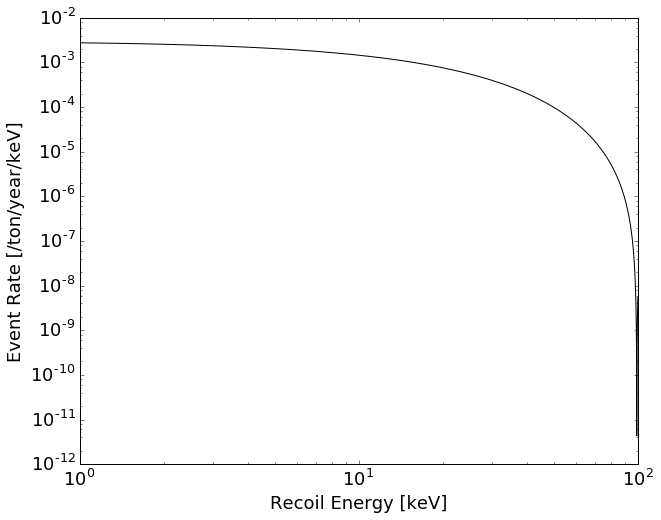

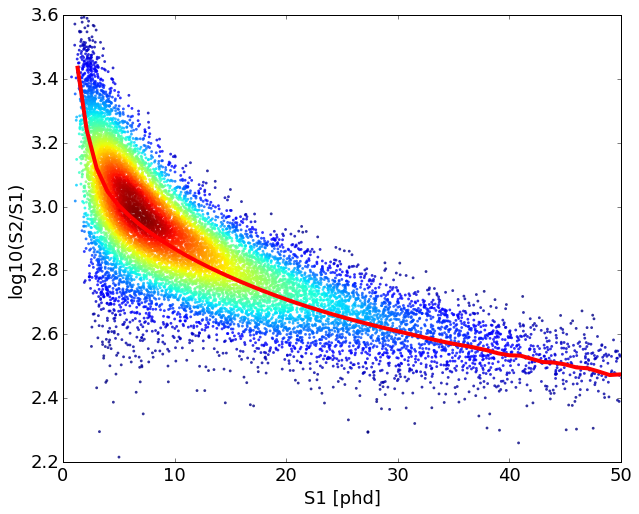

In [19]:
# ATM nu PDF
file_path='data/atm_Peter_update.txt' #caught a 2x error in rate
title='ATM'
ParticleType='NR'
nSim=2e4

NEST=NEST_setup(ParticleType=ParticleType)
Nph, Ne, S1, S2, S1c, S2c, Rate_evts_kg_day, Det_exposure_factor = dN2S1S2(NEST=NEST, file_path=file_path, nSim=nSim)

WS_cut=(S1c>0) & (S2>=S2raw_min)
S1_cut=S1c[WS_cut]
S2_cut=S2c[WS_cut]

#make a scatter plot
plt.figure()
scatterColor(S1_cut,log10(S2_cut/S1_cut))
plt.xlabel('S1 [phd]')
plt.ylabel('log10(S2/S1)')
#plt.plot([S1_min,S1_min],[2,3.8],'-.m',linewidth=4)
#plt.plot([S1_max,S1_max],[2,3.8],'-.m',linewidth=4)
plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r',linewidth=4)
#plot(S1_bin_cen_n,mean_S2oS1_e,'-b',linewidth=4)
plt.xlim([0,50])
plt.ylim([2.2,3.6])

savefig('figs/'+title+'_S2S1.png')

#calc LZ  nominal exposure
calc_exposure(S1_cut, S2_cut)

rnd_index=np.random.choice(np.arange(0,len(S1c)),int(nSim/Det_exposure_factor))
S1_atm=S1c[rnd_index]
S2_atm=S2c[rnd_index]
S2_atm_raw=S2[rnd_index]

<h1> B8 nu PDF </h1>

total between 1.00 and 4.40 keV = 0.000260662 [evts/kg/day]
Detector exposure factor = 685.069
Count (0 to 20 S1) = 6.920 +/- 0.101
Count below NR mean (0 to 20 S1) = 6.920 +/- 0.101


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: LCE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: EField (Potential memory leak).


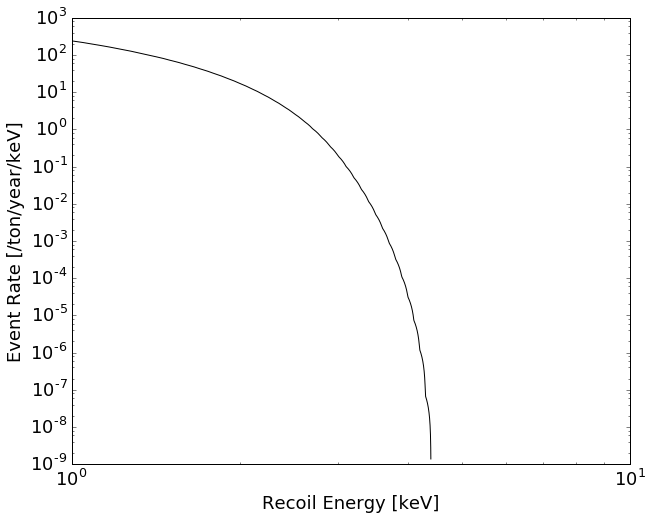

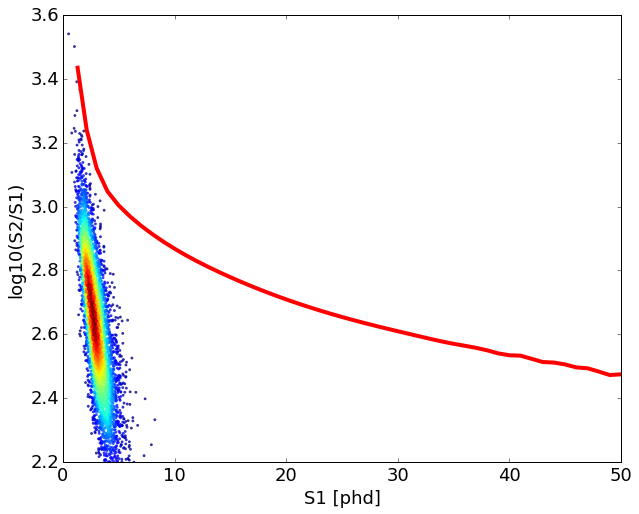

In [20]:
# B8 nu PDF
file_path='data/B8_Peter.txt' #caught a 2x error in rate
title='B8'
ParticleType='NR'
nSim=1e6

NEST=NEST_setup(ParticleType=ParticleType)
Nph, Ne, S1, S2, S1c, S2c, Rate_evts_kg_day, Det_exposure_factor = dN2S1S2(NEST=NEST, file_path=file_path, nSim=nSim)

WS_cut=(S1c>0) & (S2>=S2raw_min)
S1_cut=S1c[WS_cut]
S2_cut=S2c[WS_cut]

#make a scatter plot
plt.figure()
scatterColor(S1_cut,log10(S2_cut/S1_cut))
plt.xlabel('S1 [phd]')
plt.ylabel('log10(S2/S1)')
#plt.plot([S1_min,S1_min],[2,3.8],'-.m',linewidth=4)
#plt.plot([S1_max,S1_max],[2,3.8],'-.m',linewidth=4)
plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r',linewidth=4)
#plot(S1_bin_cen_n,mean_S2oS1_e,'-b',linewidth=4)
plt.xlim([0,50])
plt.ylim([2.2,3.6])

savefig('figs/'+title+'_S2S1.png')

#calc LZ  nominal exposure
calc_exposure(S1_cut, S2_cut)

rnd_index=np.random.choice(np.arange(0,len(S1c)),int(nSim/Det_exposure_factor))
S1_b8=S1c[rnd_index]
S2_b8=S2c[rnd_index]
S2_b8_raw=S2[rnd_index]

<h1> HEP nu PDF </h1>

total between 0.10 and 5.80 keV = 6.32879e-06 [evts/kg/day]
Detector exposure factor = 56431.5
Count (0 to 20 S1) = 0.235 +/- 0.002
Count below NR mean (0 to 20 S1) = 0.233 +/- 0.002


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: LCE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: EField (Potential memory leak).


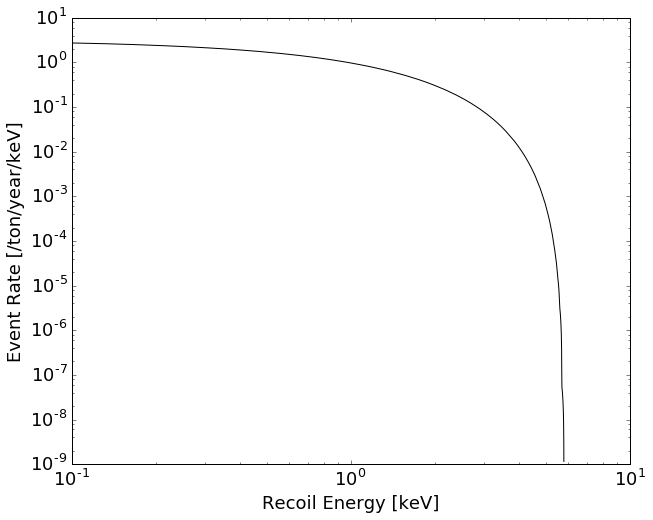

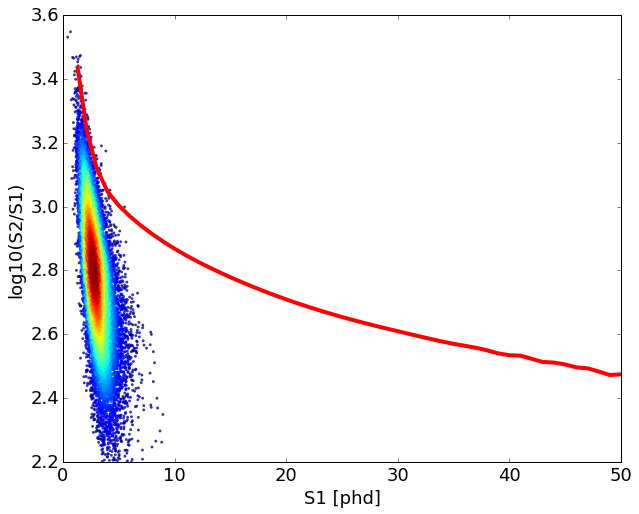

In [21]:
# HEP nu PDF
file_path='data/hep_Peter.txt' #caught a 2x error in rate
title='HEP'
ParticleType='NR'
nSim=2e6

NEST=NEST_setup(ParticleType=ParticleType)
Nph, Ne, S1, S2, S1c, S2c, Rate_evts_kg_day, Det_exposure_factor = dN2S1S2(NEST=NEST, file_path=file_path, nSim=nSim)

WS_cut=(S1c>0) & (S2>=S2raw_min)
S1_cut=S1c[WS_cut]
S2_cut=S2c[WS_cut]

#make a scatter plot
plt.figure()
scatterColor(S1_cut,log10(S2_cut/S1_cut))
plt.xlabel('S1 [phd]')
plt.ylabel('log10(S2/S1)')
#plt.plot([S1_min,S1_min],[2,3.8],'-.m',linewidth=4)
#plt.plot([S1_max,S1_max],[2,3.8],'-.m',linewidth=4)
plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r',linewidth=4)
#plot(S1_bin_cen_n,mean_S2oS1_e,'-b',linewidth=4)
plt.xlim([0,50])
plt.ylim([2.2,3.6])

savefig('figs/'+title+'_S2S1.png')

#calc LZ  nominal exposure
calc_exposure(S1_cut, S2_cut)

rnd_index=np.random.choice(np.arange(0,len(S1c)),int(nSim/Det_exposure_factor))
S1_hep=S1c[rnd_index]
S2_hep=S2c[rnd_index]
S2_hep_raw=S2[rnd_index]

<h1> DSN nu PDF </h1>

total between 0.10 and 118.35 keV = 1.21975e-07 [evts/kg/day]
Detector exposure factor = 73199.8
Count (0 to 20 S1) = 0.090 +/- 0.001
Count below NR mean (0 to 20 S1) = 0.058 +/- 0.001


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: LCE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: EField (Potential memory leak).


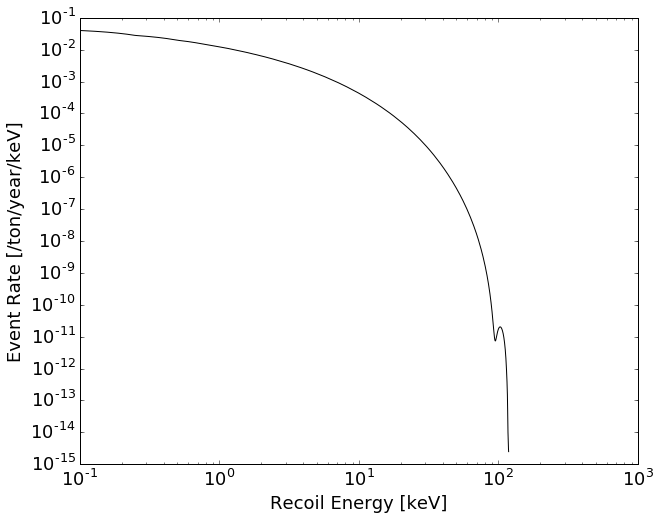

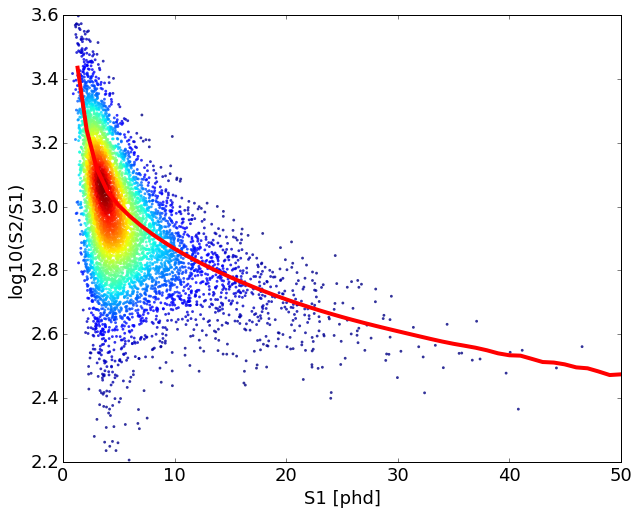

In [22]:
# DSN nu PDF
file_path='data/DSN_DiffRate.txt' #caught a 2x error in rate
title='DSN'
ParticleType='NR'
nSim=5e4

NEST=NEST_setup(ParticleType=ParticleType)
Nph, Ne, S1, S2, S1c, S2c, Rate_evts_kg_day, Det_exposure_factor = dN2S1S2(NEST=NEST, file_path=file_path, nSim=nSim)

WS_cut=(S1c>0) & (S2>=S2raw_min)
S1_cut=S1c[WS_cut]
S2_cut=S2c[WS_cut]

#make a scatter plot
plt.figure()
scatterColor(S1_cut,log10(S2_cut/S1_cut))
plt.xlabel('S1 [phd]')
plt.ylabel('log10(S2/S1)')
#plt.plot([S1_min,S1_min],[2,3.8],'-.m',linewidth=4)
#plt.plot([S1_max,S1_max],[2,3.8],'-.m',linewidth=4)
plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r',linewidth=4)
#plot(S1_bin_cen_n,mean_S2oS1_e,'-b',linewidth=4)
plt.xlim([0,50])
plt.ylim([2.2,3.6])

savefig('figs/'+title+'_S2S1.png')

#calc LZ  nominal exposure
calc_exposure(S1_cut, S2_cut)

rnd_index=np.random.choice(np.arange(0,len(S1c)),int(nSim/Det_exposure_factor))
S1_dsn=S1c[rnd_index]
S2_dsn=S2c[rnd_index]
S2_dsn_raw=S2[rnd_index]

<h1> PP + 7 Be </h1>

total between 0.00 and 200.00 keV = 0.00110144 [evts/kg/day]
Detector exposure factor = 16.2126
Count (0 to 20 S1) = 267.631 +/- 4.063
Count below NR mean (0 to 20 S1) = 0.740 +/- 0.214


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: LCE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: EField (Potential memory leak).


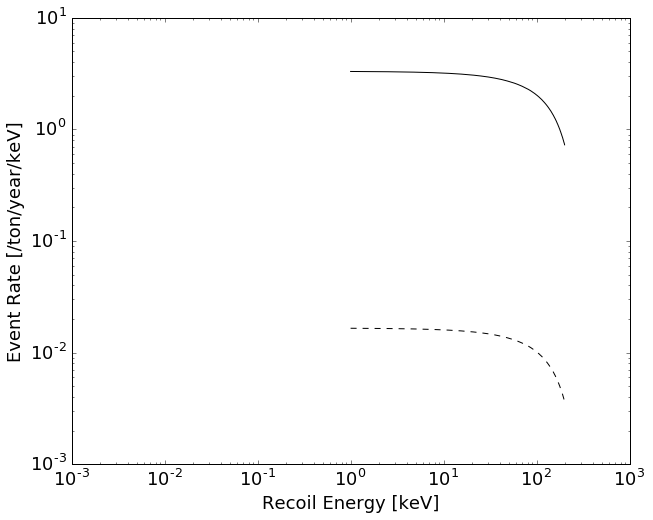

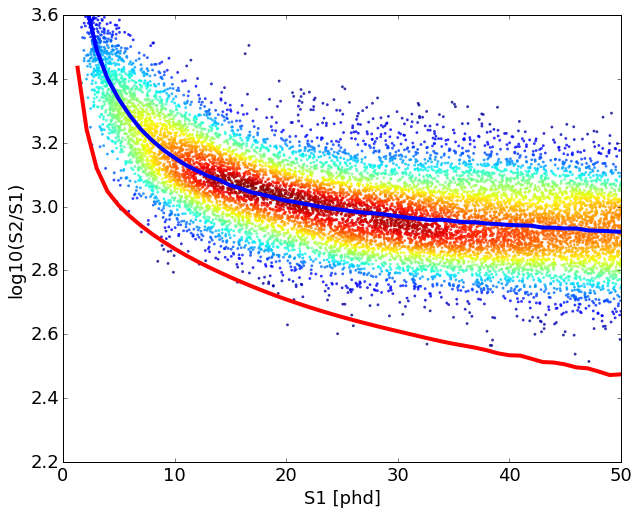

In [23]:
# PP nu PDF
file_path='data/PPsolarNu_Peter.txt' #caught a 2x error in rate
title='PP'
ParticleType='ER'
nSim=1e5

NEST=NEST_setup(ParticleType=ParticleType)
Nph, Ne, S1, S2, S1c, S2c, Rate_evts_kg_day, Det_exposure_factor = dN2S1S2(NEST=NEST, file_path=file_path, nSim=nSim)

WS_cut=(S1c>0) & (S2>=S2raw_min) & (S1c<60)
S1_cut=S1c[WS_cut]
S2_cut=S2c[WS_cut]

#make a scatter plot
plt.figure()
scatterColor(S1_cut,log10(S2_cut/S1_cut))
plt.xlabel('S1 [phd]')
plt.ylabel('log10(S2/S1)')
#plt.plot([S1_min,S1_min],[2,3.8],'-.m',linewidth=4)
#plt.plot([S1_max,S1_max],[2,3.8],'-.m',linewidth=4)
plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r',linewidth=4)
plot(S1_bin_cen_n,mean_S2oS1_e,'-b',linewidth=4)
plt.xlim([0,50])
plt.ylim([2.2,3.6])

savefig('figs/'+title+'_S2S1.png')

#calc LZ  nominal exposure
calc_exposure(S1_cut, S2_cut)

rnd_index=np.random.choice(np.arange(0,len(S1c)),int(nSim/Det_exposure_factor))
S1_pp=S1c[rnd_index]
S2_pp=S2c[rnd_index]
S2_pp_raw=S2[rnd_index]

<h1> Rn222 </h1>

total between 0.10 and 100.00 keV = 0.00278915 [evts/kg/day]
Detector exposure factor = 6.40236
Count (0 to 20 S1) = 856.247 +/- 11.565
Count below NR mean (0 to 20 S1) = 3.124 +/- 0.699


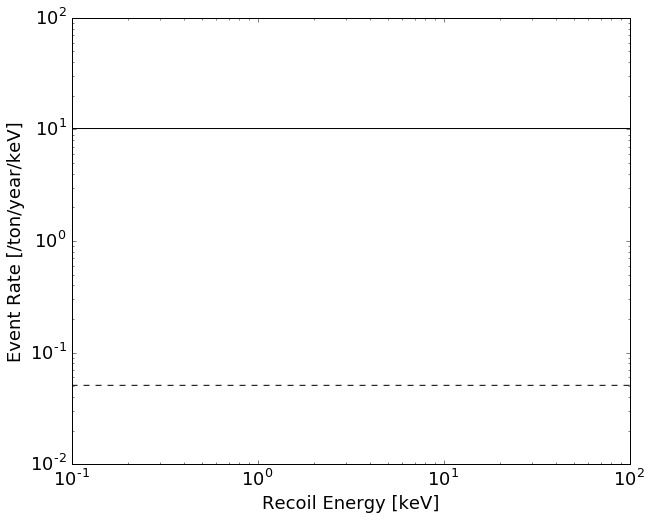

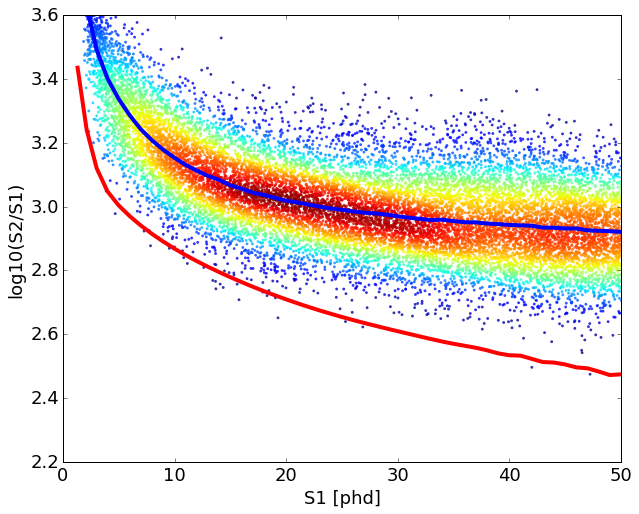

In [24]:
title='Rn222'
NEST.SetParticleType(1)
nSim=1e5

#scale factor c. LZ has 2 uBq/kg total and 3.57 in the fid
c=1*1.91*(9.2/6.3) # LZ fiducial with 1.91 uBq/kg in the active volume
Eee=np.linspace(0.1,100,2e3) # to 100 keV
Rn222 = c*3.65*ones(size(Eee))# (0.01 DRU per mBq/kg) #3.65 evts/keV/ton/year per 1 uBq/kg ... now LZ has 2 uBq/kg total
dR = Rn222 #evts/keV/ton/year

np.savetxt('data/Rn222_LZ_fid.txt' ,np.vstack([Eee, dR]).T)
file_path='data/Rn222_LZ_fid.txt'


Nph, Ne, S1, S2, S1c, S2c, Rate_evts_kg_day, Det_exposure_factor = dN2S1S2(NEST=NEST, file_path=file_path, nSim=nSim)

WS_cut=(S1c>0) & (S2>=S2raw_min) & (S1c<60) #last cut is to speed up plotting
S1_cut=S1c[WS_cut]
S2_cut=S2c[WS_cut]

#make a scatter plot
plt.figure()
scatterColor(S1_cut,log10(S2_cut/S1_cut))
plt.xlabel('S1 [phd]')
plt.ylabel('log10(S2/S1)')
#plt.plot([S1_min,S1_min],[2,3.8],'-.m',linewidth=4)
#plt.plot([S1_max,S1_max],[2,3.8],'-.m',linewidth=4)
plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r',linewidth=4)
plot(S1_bin_cen_n,mean_S2oS1_e,'-b',linewidth=4)
plt.xlim([0,50])
plt.ylim([2.2,3.6])

savefig('figs/'+title+'_S2S1.png')

#calc LZ  nominal exposure
calc_exposure(S1_cut, S2_cut)

rnd_index=np.random.choice(np.arange(0,len(S1c)),int(nSim/Det_exposure_factor))
S1_Rn=S1c[rnd_index]
S2_Rn=S2c[rnd_index]
S2_Rn_raw=S2[rnd_index]

<h1> Rn220 </h1>

total between 0.10 and 100.00 keV = 0.000457238 [evts/kg/day]
Detector exposure factor = 39.0544
Count (0 to 20 S1) = 143.287 +/- 1.915
Count below NR mean (0 to 20 S1) = 0.205 +/- 0.072


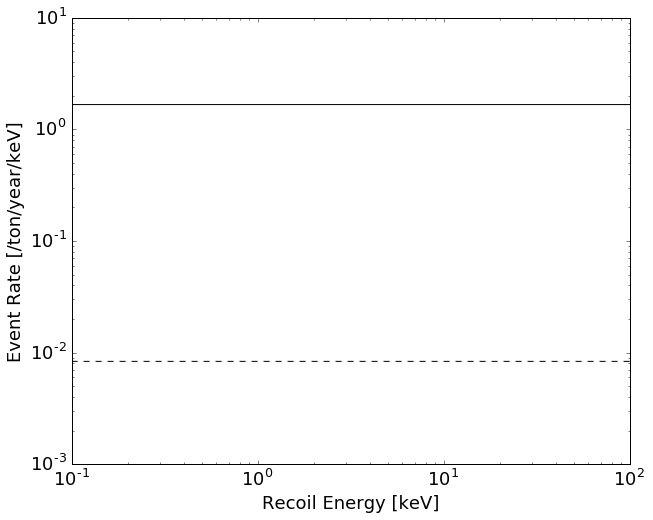

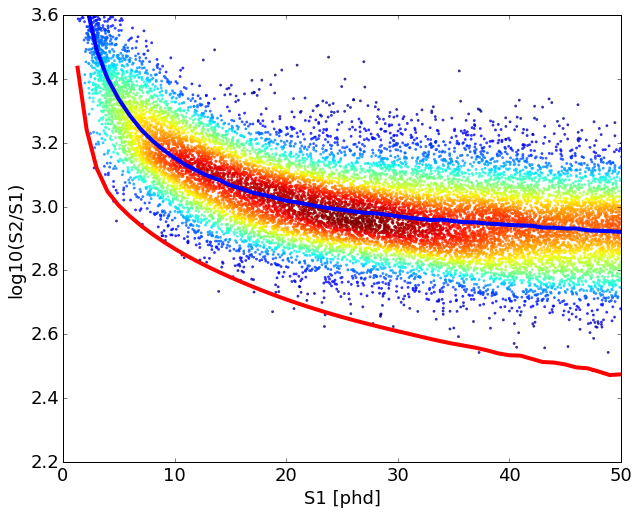

In [25]:
title='Rn220'
NEST.SetParticleType(1)
nSim=1e5

#scale factor c. LZ has 2 uBq/kg total and 3.57 in the fid
c=1*1.91*(9.2/6.3)*1/6.1 # LZ fiducial with 2 uBq/kg
Eee=np.linspace(0.1,100,2e3) # to 100 keV
Rn222 = c*3.65*ones(size(Eee))# (0.01 DRU per mBq/kg) #3.65 evts/keV/ton/year per 1 uBq/kg ... now LZ has 2 uBq/kg total
dR = Rn222 #evts/keV/ton/year

np.savetxt('data/Rn220_LZ_fid.txt' ,np.vstack([Eee, dR]).T)
file_path='data/Rn220_LZ_fid.txt'


Nph, Ne, S1, S2, S1c, S2c, Rate_evts_kg_day, Det_exposure_factor = dN2S1S2(NEST=NEST, file_path=file_path, nSim=nSim)

WS_cut=(S1c>0) & (S2>=S2raw_min) & (S1c<60)
S1_cut=S1c[WS_cut]
S2_cut=S2c[WS_cut]

#make a scatter plot
plt.figure()
scatterColor(S1_cut,log10(S2_cut/S1_cut))
plt.xlabel('S1 [phd]')
plt.ylabel('log10(S2/S1)')
#plt.plot([S1_min,S1_min],[2,3.8],'-.m',linewidth=4)
#plt.plot([S1_max,S1_max],[2,3.8],'-.m',linewidth=4)
plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r',linewidth=4)
plot(S1_bin_cen_n,mean_S2oS1_e,'-b',linewidth=4)
plt.xlim([0,50])
plt.ylim([2.2,3.6])

savefig('figs/'+title+'_S2S1.png')

#calc LZ  nominal exposure
calc_exposure(S1_cut, S2_cut)

rnd_index=np.random.choice(np.arange(0,len(S1c)),int(nSim/Det_exposure_factor))
S1_Rn220=S1c[rnd_index]
S2_Rn220=S2c[rnd_index]
S2_Rn220_raw=S2[rnd_index]

<h1> Paolo NR BG </h1>

total between 1.00 and 199.00 keV = 1.40141e-07 [evts/kg/day]
Detector exposure factor = 12742.3
Count (0 to 20 S1) = 0.334 +/- 0.005
Count below NR mean (0 to 20 S1) = 0.141 +/- 0.003


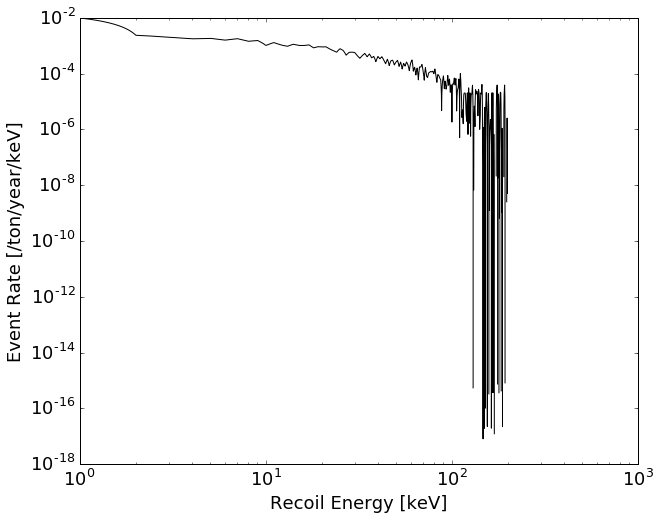

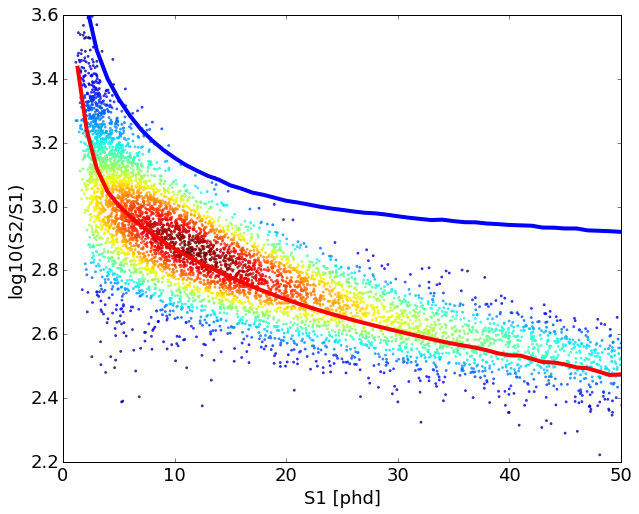

In [26]:
title='Paolo_NR'
file_path='data/rate_nr_fidvol.txt' 
ParticleType=0 #'NR'
nSim=1e4

NEST.SetParticleType(ParticleType)
Nph, Ne, S1, S2, S1c, S2c, Rate_evts_kg_day, Det_exposure_factor = dN2S1S2(NEST=NEST, file_path=file_path, nSim=nSim)

WS_cut=(S1c>0) & (S2>=S2raw_min)
S1_cut=S1c[WS_cut]
S2_cut=S2c[WS_cut]

#make a scatter plot
plt.figure()
scatterColor(S1_cut,log10(S2_cut/S1_cut))
plt.xlabel('S1 [phd]')
plt.ylabel('log10(S2/S1)')
#plt.plot([S1_min,S1_min],[2,3.8],'-.m',linewidth=4)
#plt.plot([S1_max,S1_max],[2,3.8],'-.m',linewidth=4)
plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r',linewidth=4)
plot(S1_bin_cen_n,mean_S2oS1_e,'-b',linewidth=4)
plt.xlim([0,50])
plt.ylim([2.2,3.6])

savefig('figs/'+title+'_S2S1.png')

#calc LZ  nominal exposure
calc_exposure(S1_cut, S2_cut)

rnd_index=np.random.choice(np.arange(0,len(S1c)),int(nSim/Det_exposure_factor*2))
S1_Nr=S1c[rnd_index]
S2_Nr=S2c[rnd_index]
S2_Nr_raw=S2[rnd_index]

<h1> Generate WIMP signal </h1>

total rate above 0.00 keV = 749858 [evts/kg/day per pb]
Detector exposure factor per pb = 4.76281e-08
total rate above 0.00 keV = 1.0943e+06 [evts/kg/day per pb]
Detector exposure factor per pb = 1.30546e-08
total rate above 0.00 keV = 1.02045e+06 [evts/kg/day per pb]
Detector exposure factor per pb = 6.99974e-09
total rate above 0.00 keV = 679106 [evts/kg/day per pb]
Detector exposure factor per pb = 5.25901e-09


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: LCE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: EField (Potential memory leak).


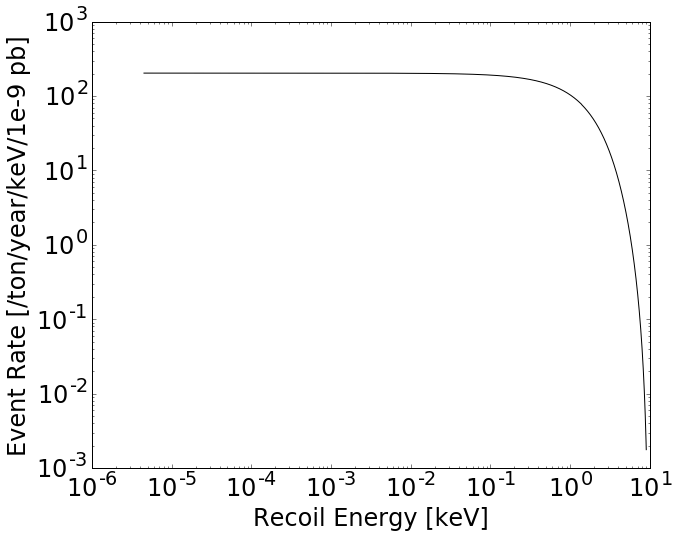

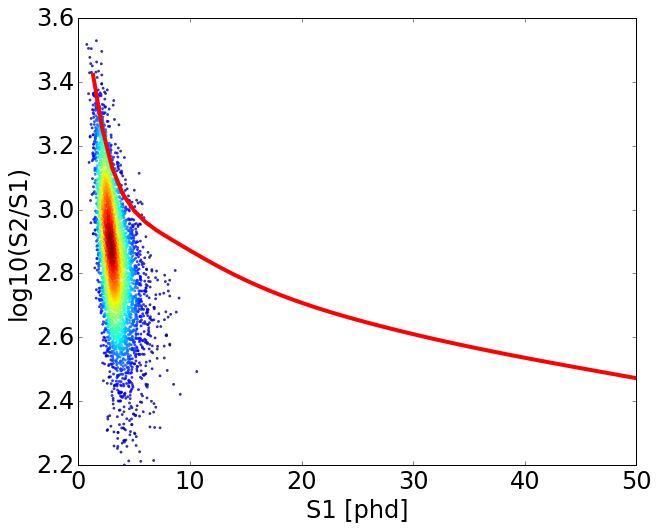

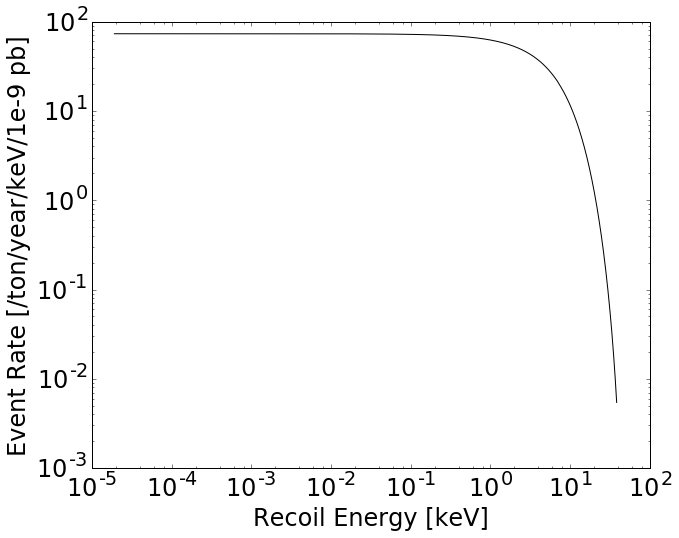

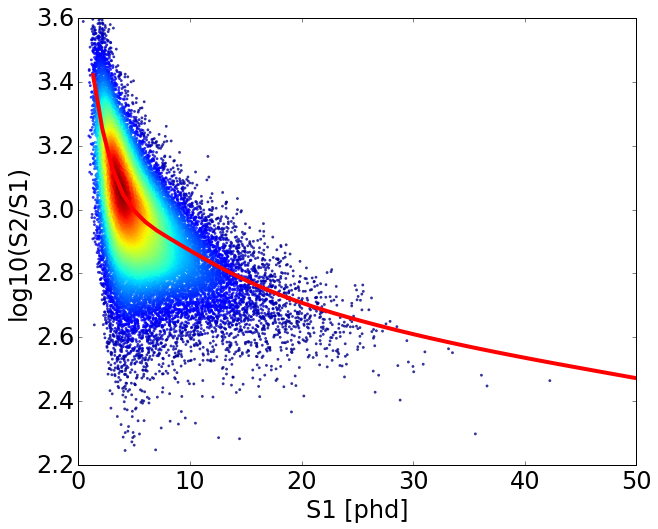

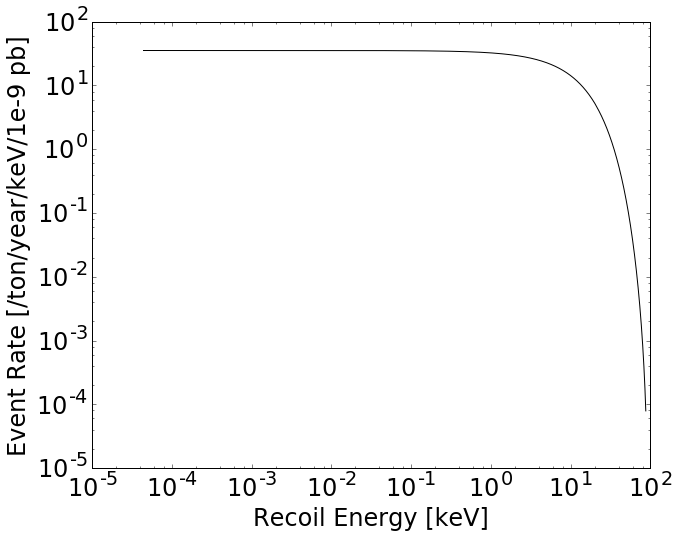

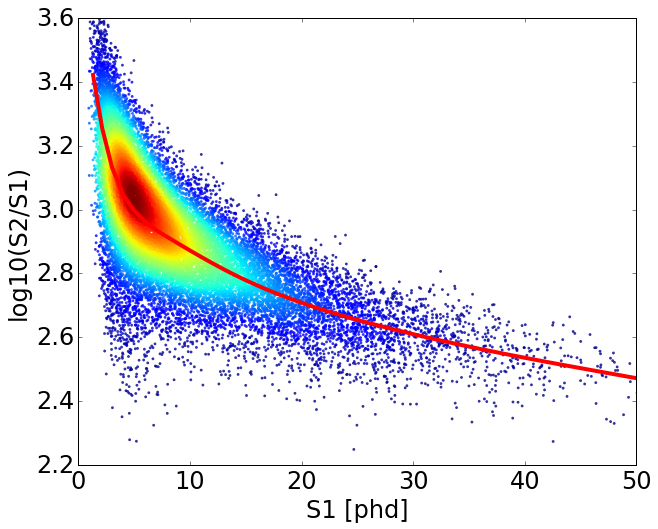

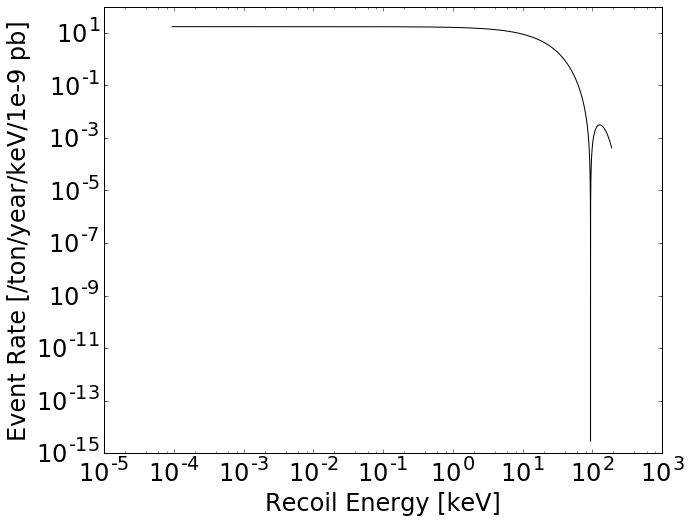

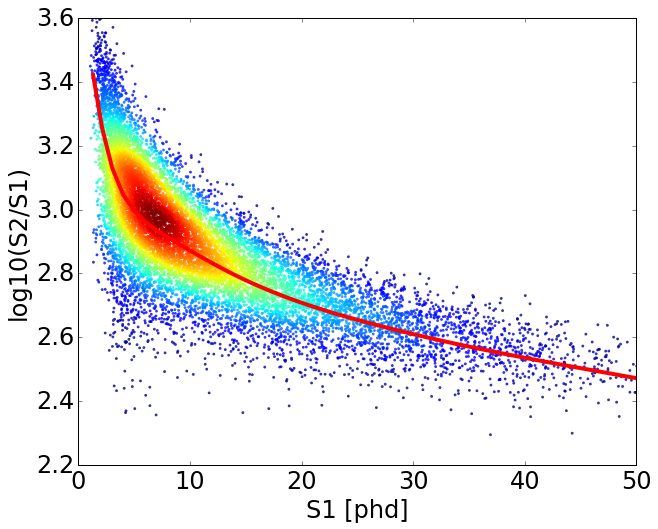

In [125]:
S2raw_min=450
nSim=1e4
NEST=NEST_setup() #defult is LZ and NR

#Generate WIMPs
for mWmp,nSim in zip(int32([10,25,50,100]),int32([2e5,8e4,4e4,2e4])):
    Nph, Ne, S1, S2, S1c, S2c, WmpRate, Det_exposure_factor=WIMP2NphNe(NEST=NEST,mWmp=mWmp,nSim=nSim)
    # 1e-45 cm^2 cross section
    title='WIMP_M'+str(mWmp)

    WS_cut=(S1c>0) & (S2>=S2raw_min)
    S1_cut=S1c[WS_cut]
    S2_cut=S2c[WS_cut]

    #make a scatter plot
    plt.figure()
    scatterColor(S1_cut,log10(S2_cut/S1_cut))
    plt.xlabel('S1 [phd]')
    plt.ylabel('log10(S2/S1)')
    plt.rcParams.update({'font.size': 24})
    #plt.plot([S1_min,S1_min],[2,3.8],'-.m',linewidth=4)
    #plt.plot([S1_max,S1_max],[2,3.8],'-.m',linewidth=4)
    plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r',linewidth=4)
    plt.xlim([0,50])
    plt.ylim([2.2,3.6])
    savefig('figs/'+title+'_S2S1.png')
    
    if mWmp==50:
        rnd_index=np.random.choice(np.arange(0,len(S1c)),int(nSim/(Det_exposure_factor/1e-9)/100)) #for a 1e-47 cross-section
        S1_mw50=S1c[rnd_index]
        S2_mw50=S2c[rnd_index]
        S2_mw50_raw=S2[rnd_index]


<h1> Check NR interpolation </h1>

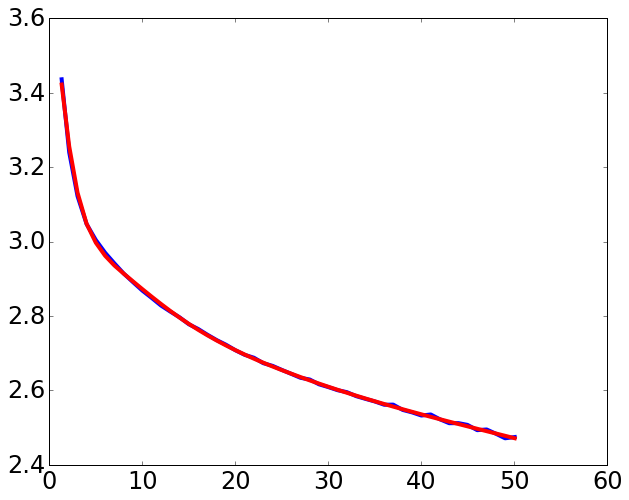

In [28]:
plot(S1_bin_cen_n,mean_S2oS1_n,'-b',linewidth=4)
#get NR mean, with a smooth spline
sNR = ip.UnivariateSpline(S1_bin_cen_n, mean_S2oS1_n,s=.001)
plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r',linewidth=4)

<h1> Plot 1 LZ exposure </h1>

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:69: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:70: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:72: RuntimeWarning: invalid value encountered in less_equal


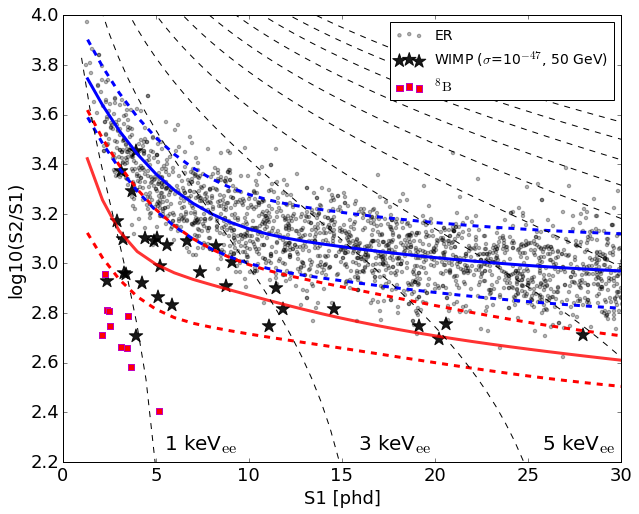

In [133]:
#search below 50% NR mean and from 3 to 20 PE (1.5 to 6.5 keVee with g1=0.075)
S1_min=1
S1_max=50
S2raw_min=450 #about 5 electrons
title='mW50-sig-1e47-'

#define combined cnns signal
S1_cnns=np.hstack([S1_b8,S1_atm,S1_hep,S1_dsn])
S2_cnns=np.hstack([S2_b8,S2_atm,S2_hep,S2_dsn])
S2_cnns_raw=np.hstack([S2_b8_raw,S2_atm_raw,S2_hep_raw,S2_dsn_raw])
S1_er=np.hstack([S1_pp,S1_Rn,S1_Rn220])
S2_er=np.hstack([S2_pp,S2_Rn,S2_Rn220])
S2_er_raw=np.hstack([S2_pp_raw,S2_Rn_raw,S2_Rn220_raw])

#make cuts to plot Rn, PP, cnns and 50 GeV WIMP signal
WS_cut_rn=(inrange(S1_Rn,[S1_min,S1_max])) & (S2_Rn_raw>=S2raw_min)
WS_cut_pp=(inrange(S1_pp,[S1_min,S1_max])) & (S2_pp_raw>=S2raw_min)
WS_cut_cnns=(inrange(S1_cnns,[S1_min,S1_max])) & (S2_cnns_raw>=S2raw_min)
WS_cut_er=(inrange(S1_er,[S1_min,S1_max])) & (S2_er_raw>=S2raw_min)
WS_cut_wmp=(inrange(S1_mw50,[S1_min,S1_max])) & (S2_mw50_raw>=S2raw_min)


#plot NR band
plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r',linewidth=3,alpha=0.8)
s = ip.UnivariateSpline(S1_bin_cen_n, mean_S2oS1_n, s=.01)
s_ub = ip.UnivariateSpline(S1_bin_cen_n, mean_S2oS1_n+1.28*std_S2oS1_n, s=.01) #1.28 sigma for 10-90% bands
s_lb = ip.UnivariateSpline(S1_bin_cen_n, mean_S2oS1_n-1.28*std_S2oS1_n, s=.01)
plot(S1_bin_cen_n,s_ub(S1_bin_cen_n),'--r',linewidth=3)
plot(S1_bin_cen_n,s_lb(S1_bin_cen_n),'--r',linewidth=3)

#plot ER band, with a smooth spline
s = ip.UnivariateSpline(S1_bin_cen_e, mean_S2oS1_e, s=.01)
s_ub = ip.UnivariateSpline(S1_bin_cen_e, mean_S2oS1_e+1.28*std_S2oS1_e, s=.01) #1.28 sigma for 10-90% bands
s_lb = ip.UnivariateSpline(S1_bin_cen_e, mean_S2oS1_e-1.28*std_S2oS1_e, s=.01)
plot(S1_bin_cen_e,s(S1_bin_cen_e),'-b',linewidth=3)
plot(S1_bin_cen_e,s_ub(S1_bin_cen_e),'--b',linewidth=3)
plot(S1_bin_cen_e,s_lb(S1_bin_cen_e),'--b',linewidth=3)

plt.scatter(S1_er[WS_cut_er],log10(S2_er[WS_cut_er]/S1_er[WS_cut_er]),color='k',s=12,alpha=0.3,label='ER')
#plt.scatter(S1_Rn[WS_cut_rn],log10(S2_Rn[WS_cut_rn]/S1_Rn[WS_cut_rn]),color='magenta',s=10,alpha=0.3,label='ER')
#plt.scatter(S1_pp[WS_cut_pp],log10(S2_pp[WS_cut_pp]/S1_pp[WS_cut_pp]),color='blue',s=15,alpha=0.3,label='PP Solar',marker='^',edgecolor='b',linewidths=1)


plt.scatter(S1_mw50[WS_cut_wmp],log10(S2_mw50[WS_cut_wmp]/S1_mw50[WS_cut_wmp]),s=200\
            ,color="k", alpha=0.9, edgecolor='k', marker='*',label=r'WIMP ($\rm{\sigma}$=10$\rm{^{-47}}$, 50 GeV)')

plt.scatter(S1_cnns[WS_cut_cnns],log10(S2_cnns[WS_cut_cnns]/S1_cnns[WS_cut_cnns]),\
            color='red',s=40,alpha=1,marker='s',label=r'$\rm{^8B}$',edgecolor='m')
plt.xlabel('S1 [phd]')
plt.ylabel('log10(S2/S1)')
plt.rcParams.update({'font.size': 18})
#plt.plot([S1_min,S1_min],[2,3.8],'-.m',linewidth=4)
#plt.plot([S1_max,S1_max],[2,3.8],'-.m',linewidth=4)

#plot NR mean, with a smooth spline, and calculate number of WS candidates
#sNR = ip.UnivariateSpline(S1_bin_cen_n, mean_S2oS1_n)
#WS_under_NRmean= sum((log10(S2[WS_cut]/S1[WS_cut])<=sNR(S1[WS_cut])) ) 
#WS_above_NRmean= sum((log10(S2[WS_cut]/S1[WS_cut])>sNR(S1[WS_cut])) )



#threshold line
s1_t=np.linspace(1,10,100)
s2s1_t=log10(S2raw_min/s1_t)
#plt.plot(s1_t,s2s1_t,'--k')

#energy contours
s1_e=np.linspace(1,50,100)
for en in range(1,20,2):
    s2_e=113*(en*73-s1_e/0.075) #113=g2
    plot(s1_e,log10(s2_e/s1_e),'--k')
    s2s1=log10(s2_e/s1_e)
    if en <6:
        index=int32(np.where(s2s1<=2.0)[0][0])
        matplotlib.mathtext.SHRINK_FACTOR = 0.8
        plt.text(s1_e[index],2.25,str(en)+' keV'+r'$\mathrm{_{ee}}$',fontsize=20)

plt.legend(fontsize=14,numpoints=1,loc='upper right',frameon = 1,framealpha=1)

#plt.xscale('log')
xlim([0,30])
ylim([2.2,4.0])
savefig('figs/'+title+'_1LZ.pdf')
savefig('figs/'+title+'_1LZ.png')

<h1> Alastair version </h1>

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:54: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:55: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:57: RuntimeWarning: invalid value encountered in less_equal


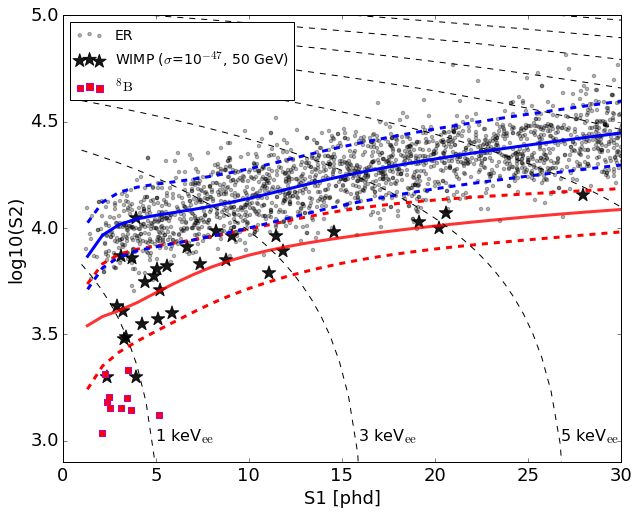

In [136]:
#search below 50% NR mean and from 3 to 20 PE (1.5 to 6.5 keVee with g1=0.075)
S1_min=1
S1_max=50
S2raw_min=450 #about 5 electrons
title='mW50-sig-1e47-'


#plot NR band
plot(S1_bin_cen_n,sNR(S1_bin_cen_n)+log10(S1_bin_cen_n),'-r',linewidth=3,alpha=0.8)
s = ip.UnivariateSpline(S1_bin_cen_n, mean_S2oS1_n, s=.01)
s_ub = ip.UnivariateSpline(S1_bin_cen_n, mean_S2oS1_n+1.28*std_S2oS1_n, s=.01) #1.28 sigma for 10-90% bands
s_lb = ip.UnivariateSpline(S1_bin_cen_n, mean_S2oS1_n-1.28*std_S2oS1_n, s=.01)
plot(S1_bin_cen_n,s_ub(S1_bin_cen_n)+log10(S1_bin_cen_n),'--r',linewidth=3)
plot(S1_bin_cen_n,s_lb(S1_bin_cen_n)+log10(S1_bin_cen_n),'--r',linewidth=3)

#plot ER band, with a smooth spline
s = ip.UnivariateSpline(S1_bin_cen_e, mean_S2oS1_e, s=.01)
s_ub = ip.UnivariateSpline(S1_bin_cen_e, mean_S2oS1_e+1.28*std_S2oS1_e, s=.01) #1.28 sigma for 10-90% bands
s_lb = ip.UnivariateSpline(S1_bin_cen_e, mean_S2oS1_e-1.28*std_S2oS1_e, s=.01)
plot(S1_bin_cen_e,s(S1_bin_cen_e)+log10(S1_bin_cen_e),'-b',linewidth=3)
plot(S1_bin_cen_e,s_ub(S1_bin_cen_e)+log10(S1_bin_cen_e),'--b',linewidth=3)
plot(S1_bin_cen_e,s_lb(S1_bin_cen_e)+log10(S1_bin_cen_e),'--b',linewidth=3)

plt.scatter(S1_er[WS_cut_er],log10(S2_er[WS_cut_er]),color='k',s=12,alpha=0.3,edgecolor='k',label='ER'\
            ,facecolor='k')
#plt.scatter(S1_Rn[WS_cut_rn],log10(S2_Rn[WS_cut_rn]/S1_Rn[WS_cut_rn]),color='magenta',s=10,alpha=0.3,label='ER')
#plt.scatter(S1_pp[WS_cut_pp],log10(S2_pp[WS_cut_pp]/S1_pp[WS_cut_pp]),color='blue',s=15,alpha=0.3,label='PP Solar',marker='^',edgecolor='b',linewidths=1)

matplotlib.mathtext.SHRINK_FACTOR = 0.8
plt.scatter(S1_mw50[WS_cut_wmp],log10(S2_mw50[WS_cut_wmp]),s=200\
            ,color="k", alpha=0.9, edgecolor='k', marker='*',label=r'WIMP ($\rm{\sigma}$=10$\rm{^{-47}}$, 50 GeV)')

plt.scatter(S1_cnns[WS_cut_cnns],log10(S2_cnns[WS_cut_cnns]),\
            color='red',s=40,alpha=1,marker='s',label=r'$\rm{^8B}$',edgecolor='m')
plt.xlabel('S1 [phd]')
plt.ylabel('log10(S2)')

#plt.plot([S1_min,S1_min],[2,3.8],'-.m',linewidth=4)
#plt.plot([S1_max,S1_max],[2,3.8],'-.m',linewidth=4)

#plot NR mean, with a smooth spline, and calculate number of WS candidates
#sNR = ip.UnivariateSpline(S1_bin_cen_n, mean_S2oS1_n)
#WS_under_NRmean= sum((log10(S2[WS_cut]/S1[WS_cut])<=sNR(S1[WS_cut])) ) 
#WS_above_NRmean= sum((log10(S2[WS_cut]/S1[WS_cut])>sNR(S1[WS_cut])) )



#threshold line
s1_t=np.linspace(1,10,100)
s2s1_t=log10(S2raw_min/s1_t)
#plt.plot(s1_t,s2s1_t,'--k')

#energy contours
s1_e=np.linspace(1,50,100)
for en in range(1,20,2):
    s2_e=113*(en*73-s1_e/0.075) #113=g2
    plot(s1_e,log10(s2_e),'--k')
    s2s1=log10(s2_e)
    if en <6:
        index=int32(np.where(s2s1<=3.0)[0][0])
        matplotlib.mathtext.SHRINK_FACTOR = 0.8
        plt.text(s1_e[index],3.00,str(en)+' keV'+r'$\mathrm{_{ee}}$',fontsize=16)

plt.legend(fontsize=14,numpoints=1,loc='upper left',frameon = 1,framealpha=1)

#plt.xscale('log')
xlim([0,30])
ylim([2.9,5.0])
savefig('figs/'+title+'_1LZ_Stairs.pdf')
savefig('figs/'+title+'_1LZ_Stairs.png')

<h1> 1D Projection </h1>

In [156]:
#search below 50% NR mean and from 3 to 20 PE (1.5 to 6.5 keVee with g1=0.075)
S1_min=0
S1_max=10
S2raw_min=450 #about 5 electrons
title='Discrim-1D'

#define combined cnns signal
S1_cnns=np.hstack([S1_b8,S1_atm,S1_hep,S1_dsn])
S2_cnns=np.hstack([S2_b8,S2_atm,S2_hep,S2_dsn])
S2_cnns_raw=np.hstack([S2_b8_raw,S2_atm_raw,S2_hep_raw,S2_dsn_raw])
S1_er=np.hstack([S1_pp,S1_Rn,S1_Rn220])
S2_er=np.hstack([S2_pp,S2_Rn,S2_Rn220])
S2_er_raw=np.hstack([S2_pp_raw,S2_Rn_raw,S2_Rn220_raw])

#make cuts to plot Rn, PP, cnns and 50 GeV WIMP signal
WS_cut_rn=(inrange(S1_Rn,[S1_min,S1_max])) & (S2_Rn_raw>=S2raw_min)
WS_cut_pp=(inrange(S1_pp,[S1_min,S1_max])) & (S2_pp_raw>=S2raw_min)
WS_cut_cnns=(inrange(S1_cnns,[S1_min,S1_max])) & (S2_cnns_raw>=S2raw_min)
WS_cut_er=(inrange(S1_er,[S1_min,S1_max])) & (S2_er_raw>=S2raw_min)
WS_cut_wmp=(inrange(S1_mw50,[S1_min,S1_max])) & (S2_mw50_raw>=S2raw_min)

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: divide by zero encountered in true_divide
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: RuntimeWarning: divide by zero encountered in true_divide
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: divide by zero encountered in true_divide


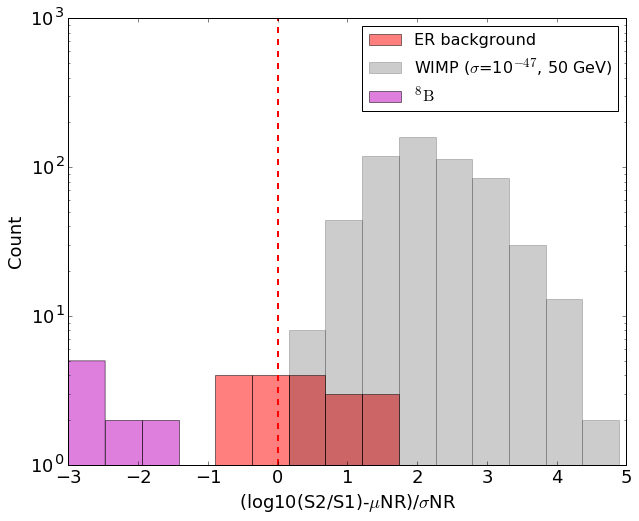

In [164]:
#interpolate the NR sigma (already have the mean as sNR)
sNR_sig = ip.UnivariateSpline(S1_bin_cen_n, std_S2oS1_n, s=.001) #1.28 sigma for 10-90% bands

fm_WIMP=(log10(S2_mw50[WS_cut_wmp]/S1_mw50[WS_cut_wmp])-sNR(S1_mw50[WS_cut_wmp]))/sNR_sig(S1_mw50[WS_cut_wmp])
fm_er=(log10(S2_er[WS_cut_er]/S1_er[WS_cut_er])-sNR(S1_er[WS_cut_er]))/sNR_sig(S1_er[WS_cut_er])
fm_cnns=(log10(S2_cnns[WS_cut_cnns]/S1_cnns[WS_cut_cnns])-sNR(S1_cnns[WS_cut_cnns]))/sNR_sig(S1_cnns[WS_cut_cnns])

xbins=np.linspace(-3,7,20)

hist(fm_WIMP,bins=xbins,normed=0,alpha=0.5,color='r',label='ER background')
hist(fm_er,bins=xbins, normed=0,alpha=0.2,color='k',label=r'WIMP ($\rm{\sigma}$=10$\rm{^{-47}}$, 50 GeV)')
hist(fm_cnns,bins=xbins,normed=0,alpha=0.5,color='m',label=r'$\rm{^8B}$')
yscale('log')
legend(loc='upper right',fontsize=16)
xlabel('(log10(S2/S1)-'+r'$\mu$'+'NR)/'+r'$\sigma$NR')
ylabel('Count')

xlim([-3,5])

plot([0,0],[1,1000],'--r',linewidth=2)

savefig('figs/'+title+'_1LZ-1D.pdf')
savefig('figs/'+title+'_1LZ-1D.png')

<h1> Luck Plot 2 </h1>

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:55: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:56: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:58: RuntimeWarning: invalid value encountered in less_equal


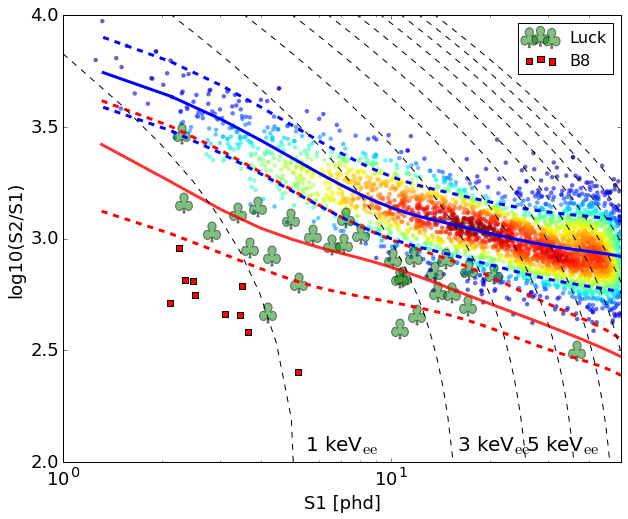

In [31]:
#search below 50% NR mean and from 3 to 20 PE (1.5 to 6.5 keVee with g1=0.075)
S1_min=1
S1_max=50
S2raw_min=450 #about 5 electrons
title='mW50-sig-1e47-'
#define combined cnns signal
S1_cnns=np.hstack([S1_b8,S1_atm,S1_hep,S1_dsn])
S2_cnns=np.hstack([S2_b8,S2_atm,S2_hep,S2_dsn])
S2_cnns_raw=np.hstack([S2_b8_raw,S2_atm_raw,S2_hep_raw,S2_dsn_raw])
S1_er=np.hstack([S1_pp,S1_Rn,S1_Rn220])
S2_er=np.hstack([S2_pp,S2_Rn,S2_Rn220])
S2_er_raw=np.hstack([S2_pp_raw,S2_Rn_raw,S2_Rn220_raw])

#make cuts to plot Rn, PP, cnns and 50 GeV WIMP signal
WS_cut_rn=(inrange(S1_Rn,[S1_min,S1_max])) & (S2_Rn_raw>=S2raw_min)
WS_cut_pp=(inrange(S1_pp,[S1_min,S1_max])) & (S2_pp_raw>=S2raw_min)
WS_cut_cnns=(inrange(S1_cnns,[S1_min,S1_max])) & (S2_cnns_raw>=S2raw_min)
WS_cut_er=(inrange(S1_er,[S1_min,S1_max])) & (S2_er_raw>=S2raw_min)
WS_cut_wmp=(inrange(S1_mw50,[S1_min,S1_max])) & (S2_mw50_raw>=S2raw_min)


#plot NR band
plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'-r',linewidth=3,alpha=0.8)
s = ip.UnivariateSpline(S1_bin_cen_n, mean_S2oS1_n, s=.01)
s_ub = ip.UnivariateSpline(S1_bin_cen_n, mean_S2oS1_n+1.28*std_S2oS1_n, s=.01) #1.28 sigma for 10-90% bands
s_lb = ip.UnivariateSpline(S1_bin_cen_n, mean_S2oS1_n-1.28*std_S2oS1_n, s=.01)
plot(S1_bin_cen_n,s_ub(S1_bin_cen_n),'--r',linewidth=3)
plot(S1_bin_cen_n,s_lb(S1_bin_cen_n),'--r',linewidth=3)

#plot ER band, with a smooth spline
s = ip.UnivariateSpline(S1_bin_cen_e, mean_S2oS1_e, s=.01)
s_ub = ip.UnivariateSpline(S1_bin_cen_e, mean_S2oS1_e+1.28*std_S2oS1_e, s=.01) #1.28 sigma for 10-90% bands
s_lb = ip.UnivariateSpline(S1_bin_cen_e, mean_S2oS1_e-1.28*std_S2oS1_e, s=.01)
plot(S1_bin_cen_e,s(S1_bin_cen_e),'-b',linewidth=3)
plot(S1_bin_cen_e,s_ub(S1_bin_cen_e),'--b',linewidth=3)
plot(S1_bin_cen_e,s_lb(S1_bin_cen_e),'--b',linewidth=3)


scatterColor(S1_er[WS_cut_er],log10(S2_er[WS_cut_er]/S1_er[WS_cut_er]),a=0.6,size=20)

plt.scatter(S1_mw50[WS_cut_wmp],log10(S2_mw50[WS_cut_wmp]/S1_mw50[WS_cut_wmp]),s=400,\
            color="g", alpha=0.5, edgecolor='k', marker=r'$\clubsuit$',label="Luck") #,label='WIMP (1e-47, 50 GeV)'
plt.scatter(S1_cnns[WS_cut_cnns],log10(S2_cnns[WS_cut_cnns]/S1_cnns[WS_cut_cnns]),\
            color='red',s=40,alpha=1,marker='s',label='B8',edgecolor='k')


#threshold line
s1_t=np.linspace(1,10,100)
s2s1_t=log10(S2raw_min/s1_t)
#plt.plot(s1_t,s2s1_t,'--k')

#energy contours

s1_e=np.linspace(1,50,100)
for en in range(1,20,2):
    s2_e=113*(en*73-s1_e/0.075) #113=g2
    plot(s1_e,log10(s2_e/s1_e),'--k')
    s2s1=log10(s2_e/s1_e)
    if en <7:
        index=int32(np.where(s2s1<=2.0)[0][0])
        matplotlib.mathtext.SHRINK_FACTOR = 0.8
        plt.text(s1_e[index],2.05,str(en)+' keV'+r'$\mathrm{_{ee}}$',fontsize=20)

plt.legend(fontsize=16,numpoints=1)
plt.xscale('log')
xlim([0,50])
ylim([2.0,4.0])

plt.xlabel('S1 [phd]')
plt.ylabel('log10(S2/S1)')

savefig('figs/'+title+'_1LZ-Luck-log.pdf')
savefig('figs/'+title+'_1LZ-Luck-log.png')
